# Plan
To classify more videos into these categories based on their titles using NLP, you can follow these steps:

1. **Data Preprocessing:**
   - Tokenize the video titles: Split each title into individual words or tokens.
   - Lowercasing: Convert all tokens to lowercase to ensure consistency.
   - Remove punctuation: Eliminate any punctuation marks from the tokens.
   - Remove stopwords: Remove common words (e.g., "the", "is", "and") that do not contribute much to the classification.
   - Stemming or Lemmatization (optional): Reduce words to their base or root form to further normalize the text data.

2. **Feature Extraction:**
   - Use techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or Bag of Words to convert the preprocessed text data into numerical feature vectors.
   - TF-IDF assigns weights to words based on their frequency in the document and inverse frequency across all documents, providing a measure of importance for each word.

3. **Model Training and Evaluation:**
   - Split the dataset into training and testing sets.
   - Train a machine learning model (e.g., Naive Bayes, Logistic Regression, Support Vector Machine, Adaboost Classifier, LSTM) using the training data and the extracted features.
   - Evaluate the trained model's performance using the testing data and metrics such as accuracy, precision, recall, and F1-score.
   
4. **Model Deployment:**
   - Once you have a satisfactory model, deploy it to classify new videos into the predefined categories based on their titles.
   - You can use the trained model to predict the classification of new video titles.

5. **Continuous Improvement:**
   - Monitor the model's performance over time and collect feedback.
   - Periodically retrain the model with updated data to improve its accuracy and effectiveness.

By following these steps, you can build an NLP-based classification system to categorize more videos into the predefined categories based on their titles.

# Set Up Environment

## Import Libraries

In [1]:
import pandas as pd

## Define Functions

# Import Data

In [2]:
videos_with_labelling_df = pd.read_csv('../training_dataset/cleaned_labelled_video_dataset.csv')

In [3]:
videos_with_labelling_df.head()

,channel_id,video_id,video_title,description,tags,published,view_count,like_count,favourite_count,comment_count,duration,definition,caption,category_id,video_type,video_topic,technologies
0,UC4xKdmAXFh4ACyhpiQ_3qBw,a3GQBdLoUOo,Why Crypto isn't coming back. I'm getting out ...,"Ex-Google TechLead gets out of crypto. ""Tech o...",NaN,2022-09-23 21:26:40.000000,152212.0,4411.0,0,1330.0,756,hd,False,27,News,Business Acumen,NaN
1,UCsvqVGtbbyHaMoevxPAq9Fg,C3ilG2-tIn0,HBase Tutorial For Beginners | HBase In Hadoop...,🔥Post Graduate Program In Data Engineering: ht...,"hbase tutorial for beginners, hbase, hbase tut...",2015-09-11 07:03:59.000000,24552.0,112.0,0,8.0,1184,hd,False,27,Tutorial,Other,"HBase, Hadoop"
2,UCW5YeuERMmlnqo4oq8vwUpg,UT9zKFYr18U,PHP Tutorial (& MySQL) #40 - File System (part 2),Extra reading - https://www.w3schools.com/php/...,"php, tutorial, php tutorial, php tutorial for ...",2019-03-12 09:11:51.000000,26930.0,565.0,0,17.0,504,hd,False,27,Tutorial,Software Engineering,"PHP, MySQL"
3,UCsvqVGtbbyHaMoevxPAq9Fg,eaTC5aReb3w,🔥 Top 10 Highest Paying Cybersecurity Jobs For...,🔥Post Graduate Program In Cyber Security: http...,"simplilearn, highest paying cybersecurity jobs...",2023-09-07 14:30:22.000000,2423.0,70.0,0,3.0,850,hd,False,27,Career Advice,Software Engineering,NaN
4,UCsvqVGtbbyHaMoevxPAq9Fg,UTOebGpWfno,Reasons Java Is Still Great #Simplilearn,🔥 IITM Pravartak Professional Certificate Prog...,"simplilearn, java, java programming, java codi...",2023-06-08 09:30:11.000000,658.0,27.0,0,3.0,60,hd,False,27,News,Software Engineering,Java


# Video Type Classification

In [4]:
videos_with_labelling_df.video_type.value_counts()

video_type
Tutorial             6005
Tips                 1150
News                 1025
Career Advice         862
Other                 845
Project               613
Podcast/Interview     266
Challenge             234
Name: count, dtype: int64

In [5]:
video_type_classification_df = videos_with_labelling_df[['video_id', 'video_title', 'video_type']].copy()

In [6]:
video_type_classification_df

,video_id,video_title,video_type
0,a3GQBdLoUOo,Why Crypto isn't coming back. I'm getting out ...,News
1,C3ilG2-tIn0,HBase Tutorial For Beginners | HBase In Hadoop...,Tutorial
2,UT9zKFYr18U,PHP Tutorial (& MySQL) #40 - File System (part 2),Tutorial
3,eaTC5aReb3w,🔥 Top 10 Highest Paying Cybersecurity Jobs For...,Career Advice
4,UTOebGpWfno,Reasons Java Is Still Great #Simplilearn,News
...,...,...,...
10995,TaE_fAqeeUE,Django 3 Blog: Creating Users in Django | Pyth...,Tutorial
10996,7Ny10fQHw8A,10 Best Programming Languages And Top Technolo...,News
10997,beUl8OgITj4,Introduction To Tensorflow,Tutorial
10998,WHnSIYV1KNQ,What is a Data Science Developer Advocate? And...,Career Advice


In [7]:
video_type_classification_df = video_type_classification_df[video_type_classification_df['video_type'] != 'Other']

In [8]:
video_type_classification_df = video_type_classification_df[video_type_classification_df['video_type'].notnull()]

In [9]:
video_type_classification_df

,video_id,video_title,video_type
0,a3GQBdLoUOo,Why Crypto isn't coming back. I'm getting out ...,News
1,C3ilG2-tIn0,HBase Tutorial For Beginners | HBase In Hadoop...,Tutorial
2,UT9zKFYr18U,PHP Tutorial (& MySQL) #40 - File System (part 2),Tutorial
3,eaTC5aReb3w,🔥 Top 10 Highest Paying Cybersecurity Jobs For...,Career Advice
4,UTOebGpWfno,Reasons Java Is Still Great #Simplilearn,News
...,...,...,...
10995,TaE_fAqeeUE,Django 3 Blog: Creating Users in Django | Pyth...,Tutorial
10996,7Ny10fQHw8A,10 Best Programming Languages And Top Technolo...,News
10997,beUl8OgITj4,Introduction To Tensorflow,Tutorial
10998,WHnSIYV1KNQ,What is a Data Science Developer Advocate? And...,Career Advice


In [11]:
video_type_classification_df.video_type.value_counts()

video_type
Tutorial             6005
Tips                 1150
News                 1025
Career Advice         862
Project               613
Podcast/Interview     266
Challenge             234
Name: count, dtype: int64

## Data Preprocessing

### Tokenization
- Tokenization is the process of splitting the text into individual words or tokens. You can use a tokenizer to break down the video titles into their constituent words.
- Example: "Front-End Developer's Roadmap 2024: A Comprehensive Guide!" → ["Front-End", "Developer's", "Roadmap", "2024", ":", "A", "Comprehensive", "Guide!"]

#### NLTK
NLTK (Natural Language Toolkit) is a powerful library for natural language processing in Python. It offers various tokenizers for different languages and purposes. Let's delve into NLTK's tokenizers and discuss their suitability for the task of tokenizing video titles.

Input Example: "Front-End Developer's Roadmap 2024: A Comprehensive Guide!"

- **Word Tokenization**: 
  Splits the text into words based on whitespace and punctuation, but keeps contractions and hyphenated words intact. It treats the apostrophe and colon as separate tokens.
  Output: ['Front-End', 'Developer', "'s", 'Roadmap', '2024', ':', 'A', 'Comprehensive', 'Guide', '!']

- **WordPunct Tokenization**: 
  Splits the text into words and punctuation marks, treating each punctuation mark as a separate token. Contractions are split into individual tokens, and hyphenated words are split.
  Output: ['Front', '-', 'End', 'Developer', "'", 's', 'Roadmap', '2024', ':', 'A', 'Comprehensive', 'Guide', '!']

- **Regexp Tokenization**: 
  Uses a regular expression pattern (\w+) to match alphanumeric characters and underscores. It splits the text into words and numbers, removing other characters like apostrophes and punctuation marks.
  Output: ['Front', 'End', 'Developer', 's', 'Roadmap', '2024', 'A', 'Comprehensive', 'Guide']

- **Treebank Tokenization**: 
  Follows the conventions of the Penn Treebank corpus. It treats hyphenated words as single tokens and preserves punctuation marks as separate tokens.
  Output: ['Front-End', 'Developer', "'s", 'Roadmap', '2024', ':', 'A', 'Comprehensive', 'Guide', '!']

WordPunct Tokenization may be the best choice for this use case because it preserves punctuation marks, handles contractions and hyphenated words effectively, and provides flexibility in tokenization. Video titles often contain punctuation marks and informal language, making WordPunct Tokenization suitable for maintaining the integrity of the title's structure while extracting meaningful units of text.

##### Lowercasing
- Convert all words in the video titles to lowercase. This ensures that words with different capitalization are treated as the same word.
- Example: "Front-End Developer's Roadmap 2024: A Comprehensive Guide!" → "front-end developer's roadmap 2024: a comprehensive guide!"

##### Removing Punctuation
- Remove any punctuation marks from the video titles. Punctuation marks such as periods, commas, exclamation marks, etc., are typically not relevant for text classification tasks.
- Example: "Front-End Developer's Roadmap 2024: A Comprehensive Guide!" → "FrontEnd Developers Roadmap 2024 A Comprehensive Guide"

##### Removing Stopwords
- Stopwords are common words that do not carry much semantic meaning, such as "and", "the", "is", etc. They are often removed because they can introduce noise into the data.
- You can use a predefined list of stopwords or a library like NLTK (Natural Language Toolkit) to remove stopwords from the video titles.
- Example: "Front-End Developer's Roadmap 2024: A Comprehensive Guide!" → "Front-End Developer's Roadmap 2024: Comprehensive Guide"
- If there are issues with certificate - try this
https://stackoverflow.com/questions/44649449/brew-installation-of-python-3-6-1-ssl-certificate-verify-failed-certificate/44649450#44649450

##### Handling Special Characters
- Depending on the nature of your dataset, you may encounter special characters such as emojis, symbols, or non-alphanumeric characters. Decide whether to keep or remove these characters based on your analysis needs.
- Example: "Front-End Developer's Roadmap 2024: A Comprehensive Guide! 😊" → "Front-End Developer's Roadmap 2024: A Comprehensive Guide!"

##### Handling Numbers
- Decide how to handle numbers in the video titles. You may choose to keep them as-is, remove them, or replace them with placeholders.
- Example: "Front-End Developer's Roadmap 2024: A Comprehensive Guide!" → "Front-End Developer's Roadmap : A Comprehensive Guide!"

##### Stemming and Lemmatization: Choosing the Right Technique

Stemming and lemmatization are essential text normalization techniques that aim to reduce words to their base or root forms. Both methods are used to enhance the efficiency of text processing and improve the performance of natural language processing (NLP) models. However, they operate differently and have distinct advantages and limitations.

##### Stemming:

Stemming involves removing prefixes or suffixes from words to derive their root forms, known as stems. The goal is to map different variations of a word to the same base form, thereby reducing the dimensionality of the vocabulary. For example, the word "running" would be stemmed to "run", and "played" would be stemmed to "play". Stemming algorithms apply heuristic rules to chop off affixes, which may not always produce valid words.

##### Lemmatization:

Lemmatization, on the other hand, maps words to their base or dictionary forms, known as lemmas, by considering the context and meaning of the word. Unlike stemming, lemmatization ensures that the resulting word is valid and meaningful. For example, the word "ran" would be lemmatized to "run", and "better" would be lemmatized to "good". Lemmatization relies on linguistic knowledge and requires access to a lexical resource such as WordNet to perform accurate transformations.

##### Choosing the Right Technique:

The choice between stemming and lemmatization depends on the specific requirements of the NLP task and the characteristics of the dataset. Stemming is faster and less computationally intensive, making it suitable for applications where speed is crucial. However, it may produce non-dictionary words or incorrect stems in certain cases. On the other hand, lemmatization ensures the generation of valid words but is slower and requires more computational resources.

When deciding between stemming and lemmatization, consider the trade-offs between efficiency and accuracy. In many cases, lemmatization is preferred for tasks requiring precise word normalization and semantic analysis, while stemming may suffice for tasks focused on text classification or information retrieval.

Both stemming and lemmatization can be easily implemented using libraries such as NLTK or spaCy, offering flexibility and ease of integration into NLP pipelines. Choose the technique that best aligns with your goals and the characteristics of your dataset to achieve optimal results in your NLP applications.


In [12]:
import pandas as pd
import re
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer 

# If there are issues with certificate - try this https://stackoverflow.com/questions/44649449/brew-installation-of-python-3-6-1-ssl-certificate-verify-failed-certificate/44649450#44649450

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def preprocess_titles(df, treatments):
    """
    Preprocesses the video titles in a DataFrame based on the specified treatments.

    Parameters:
    - df (DataFrame): The DataFrame containing the video titles.
    - treatments (list): A list of treatments to apply to the video titles. Possible treatments include:
                         'lowercasing', 'remove_punctuation', 'remove_stopwords',
                         'remove_special_characters', 'remove_numbers', 'stemming', 'lemmatization'.

    Returns:
    - Series: The preprocessed tokenized titles.
    """

    # Tokenization
    tokenizer = WordPunctTokenizer()
    df['tokenized_title'] = df['video_title'].apply(tokenizer.tokenize)

    # Apply specified treatments
    for treatment in treatments:
        if treatment == 'lowercasing':
            df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [word.lower() for word in x])
        elif treatment == 'remove_punctuation':
            df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [word for word in x if re.match(r'^\w+$', word)])
        elif treatment == 'remove_stopwords':
            stop_words = set(stopwords.words('english'))
            df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
        elif treatment == 'remove_special_characters':
            df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])
            df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [word for word in x if word])
        elif treatment == 'remove_numbers':
            df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [re.sub(r'\b\d+\b', '', word) for word in x])
            df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [word for word in x if word])
        elif treatment == 'stemming':
            porter = PorterStemmer()
            df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [porter.stem(word) for word in x])
        elif treatment == 'lemmatization':
            lemmatizer = WordNetLemmatizer()
            df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

    return df['tokenized_title']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harrynorton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harrynorton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harrynorton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/harrynorton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [13]:
# Specify the treatments to apply
treatments = ['lowercasing',
              'remove_punctuation',
              'remove_stopwords',
              #'remove_special_characters',
              #'remove_numbers',
              #'stemming',
              'lemmatization']

# Apply preprocessing to the DataFrame
video_type_classification_df['tokenized_video_title'] = preprocess_titles(video_type_classification_df.copy(), treatments)

video_type_classification_df

,video_id,video_title,video_type,tokenized_video_title
0,a3GQBdLoUOo,Why Crypto isn't coming back. I'm getting out ...,News,"[crypto, coming, back, getting, market, crash]"
1,C3ilG2-tIn0,HBase Tutorial For Beginners | HBase In Hadoop...,Tutorial,"[hbase, tutorial, beginner, hbase, hadoop, apa..."
2,UT9zKFYr18U,PHP Tutorial (& MySQL) #40 - File System (part 2),Tutorial,"[php, tutorial, mysql, 40, file, system, part, 2]"
3,eaTC5aReb3w,🔥 Top 10 Highest Paying Cybersecurity Jobs For...,Career Advice,"[top, 10, highest, paying, cybersecurity, job,..."
4,UTOebGpWfno,Reasons Java Is Still Great #Simplilearn,News,"[reason, java, still, great, simplilearn]"
...,...,...,...,...
10995,TaE_fAqeeUE,Django 3 Blog: Creating Users in Django | Pyth...,Tutorial,"[django, 3, blog, creating, user, django, pyth..."
10996,7Ny10fQHw8A,10 Best Programming Languages And Top Technolo...,News,"[10, best, programming, language, top, technol..."
10997,beUl8OgITj4,Introduction To Tensorflow,Tutorial,"[introduction, tensorflow]"
10998,WHnSIYV1KNQ,What is a Data Science Developer Advocate? And...,Career Advice,"[data, science, developer, advocate, might, gr..."


## Encoding (if necessary)
- Encode the preprocessed text data into a suitable format for further processing or analysis, such as one-hot encoding or word embeddings.

# Data Inspection

In [14]:
video_type_classification_df.head()

,video_id,video_title,video_type,tokenized_video_title
0,a3GQBdLoUOo,Why Crypto isn't coming back. I'm getting out ...,News,"[crypto, coming, back, getting, market, crash]"
1,C3ilG2-tIn0,HBase Tutorial For Beginners | HBase In Hadoop...,Tutorial,"[hbase, tutorial, beginner, hbase, hadoop, apa..."
2,UT9zKFYr18U,PHP Tutorial (& MySQL) #40 - File System (part 2),Tutorial,"[php, tutorial, mysql, 40, file, system, part, 2]"
3,eaTC5aReb3w,🔥 Top 10 Highest Paying Cybersecurity Jobs For...,Career Advice,"[top, 10, highest, paying, cybersecurity, job,..."
4,UTOebGpWfno,Reasons Java Is Still Great #Simplilearn,News,"[reason, java, still, great, simplilearn]"


In [15]:
video_type_classification_df['video_type'].value_counts()

video_type
Tutorial             6005
Tips                 1150
News                 1025
Career Advice         862
Project               613
Podcast/Interview     266
Challenge             234
Name: count, dtype: int64

# Feature Creation

## TF-IDF vectorization

### What is TF-IDF vectorization

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic used in information retrieval and text mining to evaluate the importance of a word in a document relative to a collection of documents (corpus). TF-IDF is commonly used for text feature extraction in machine learning and natural language processing tasks.

Here's a breakdown of TF-IDF:

1. **Term Frequency (TF)**: It measures how frequently a term (word) occurs in a document. It is calculated as the ratio of the number of times a term appears in a document to the total number of terms in the document. The idea is that words that occur more frequently within a document are more important for describing the content of that document.

   $$ \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} $$

2. **Inverse Document Frequency (IDF)**: It measures the importance of a term across a collection of documents (corpus). It is calculated as the logarithm of the ratio of the total number of documents to the number of documents containing the term. The IDF value decreases as the term appears in more documents, indicating that common terms are less informative than rare terms.

   $$ \text{IDF}(t, D) = \log\left(\frac{\text{Total number of documents in corpus } |D|}{\text{Number of documents containing term } t}\right) $$

3. **TF-IDF**: It combines the TF and IDF values to calculate a weighted score for each term in a document. The TF-IDF score increases with the frequency of the term in the document (TF) and decreases with the frequency of the term in the corpus (IDF).

   $$ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) $$

In essence, TF-IDF identifies words that are unique and important to a specific document while also considering their general importance across a collection of documents. It's commonly used for tasks like document classification, information retrieval, and text mining.

## sklearn TfidfVectorizer
1. **Initialize TfidfVectorizer with no preprocessing:** 
Here, we initialize a TfidfVectorizer object without specifying any preprocessing steps. By setting `preprocessor=None` and `tokenizer=None`, we indicate that we don't want any preprocessing to be applied by the vectorizer. This means that the input data will be used directly as it is without any modifications.

2. **Fit and transform the tokenized_video_title to TF-IDF vectors:** 
We apply the `fit_transform` method of the TfidfVectorizer to convert the tokenized_video_title into TF-IDF vectors. This step computes the TF-IDF values for each word in the tokenized_video_title and represents each document as a vector in the TF-IDF space.

3. **Get feature names (words):**
After fitting the TfidfVectorizer to the data, we retrieve the feature names, which correspond to the words present in the corpus. These feature names are obtained using the `get_feature_names_out()` method of the TfidfVectorizer.

4. **Get TF-IDF values for each document:**
We convert the TF-IDF matrix obtained from the fit_transform step into a NumPy array using the `toarray()` method. This array contains the TF-IDF values for each word in each document.

5. **Create a DataFrame to store TF-IDF values for each word:**
Finally, we create a DataFrame named tfidf_df to store the TF-IDF values for each word. The DataFrame has columns corresponding to the feature names (words) obtained in step 3, and each row represents a document with its corresponding TF-IDF values for each word.

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with no preprocessing
tfidf_vectorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)

# Fit and transform the tokenized_video_title to TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(video_type_classification_df['tokenized_video_title'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get TF-IDF values for each document
tfidf_values = tfidf_matrix.toarray()

# Create a DataFrame to store TF-IDF values for each word
tfidf_df = pd.DataFrame(tfidf_values, columns=feature_names)

tfidf_df


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,0,00,000,0051,01,01100100,02,03,04,05,...,क,करत,म,य,स,ह,ᵐᵒˢᵗˡʸ,𝐀,𝐂𝐎𝐃𝐄,𝐓𝐇𝐎𝐍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Find the most important words (top TF-IDF words) overall
most_important_words_overall = tfidf_df.sum().nlargest(10)

# Display the most important words overall
most_important_words_overall

tutorial       416.141824
python         333.416983
data           286.091943
simplilearn    164.954617
beginner       146.284472
2              135.717475
3              134.667566
learning       132.249979
science        132.159856
5              117.348532
dtype: float64

In [20]:
# Group the DataFrame by 'classification' and calculate the sum of TF-IDF values for each word
grouped_tfidf = tfidf_df.groupby(video_type_classification_df['video_type']).sum()

# Display the most important words for each classification
for video_type, tfidf_scores in grouped_tfidf.iterrows():
    print(f"video_type: {video_type}")
    print(tfidf_scores.nlargest(10))
    print()

video_type: Career Advice
tutorial       30.555006
python         22.655932
data           20.970769
simplilearn    13.968267
course         12.837047
2              11.940748
beginner       10.875429
3              10.855353
c              10.594186
javascript      9.497060
Name: Career Advice, dtype: float64

video_type: Challenge
tutorial       9.211156
data           6.263678
python         5.288101
c              4.186817
5              4.070427
javascript     3.858440
science        3.527747
3              3.494417
2              3.461102
simplilearn    3.341874
Name: Challenge, dtype: float64

video_type: News
tutorial       40.600618
python         27.711745
data           27.500097
simplilearn    15.671813
learning       13.420241
web            12.838578
beginner       12.689213
2              12.326046
science        12.073775
programming    11.551050
Name: News, dtype: float64

video_type: Podcast/Interview
tutorial       11.356024
python          7.706334
data            5

# Model Creation
The order in which you try different classifiers depends on various factors such as the size and nature of your dataset, the complexity of the classification task, and the computational resources available. Here's a suggested order to try these classifiers:

1. **Logistic Regression:**
   - Logistic Regression is a simple and efficient linear model that serves as a good baseline for classification tasks. It's fast to train and easy to interpret.

2. **Naive Bayes:**
   - Naive Bayes classifiers are probabilistic models based on Bayes' theorem with the assumption of independence between features. They are particularly effective for text classification tasks and work well with small to medium-sized datasets.

3. **Support Vector Machine (SVM):**
   - SVM is a powerful supervised learning algorithm capable of handling linear and nonlinear classification tasks. It's effective in high-dimensional spaces and is known for its robustness and flexibility.

4. **Adaboost Classifier:**
   - Adaboost (Adaptive Boosting) is an ensemble learning method that combines multiple weak classifiers to create a strong classifier. It sequentially corrects the errors of the previous model, making it particularly effective in boosting the performance of other algorithms.

5. **LSTM (Long Short-Term Memory):**
   - LSTM is a type of recurrent neural network (RNN) architecture commonly used for sequence prediction tasks, including natural language processing (NLP). It's capable of capturing long-term dependencies in sequential data, making it suitable for text classification tasks with complex patterns.

6. **MLP:**

Starting with simpler models like Logistic Regression and Naive Bayes allows you to quickly establish a baseline performance and understand the data characteristics. Then, you can gradually explore more complex models like SVM, Adaboost, and LSTM to improve classification accuracy if needed. Additionally, considering the computational complexity of LSTM, it's advisable to try it last, especially if you have limited computational resources.

## Logistic Regression
Make sure to handle any missing values or preprocessing steps before merging and training the model. Additionally, consider performing feature scaling or other data transformations if necessary for better model performance.

### Process

To train a Logistic Regression model using the TF-IDF vectors from `tfidf_df` and the `classification` labels from `video_classification_by_title_df`, follow these steps:

1. **Merge DataFrames:**
   Merge `tfidf_df` with `video_classification_by_title_df` on the common index (assuming the index represents the same order of samples in both DataFrames). This will bring together the TF-IDF vectors and the corresponding classification labels.

2. **Split Data:**
   Split the merged DataFrame into features (TF-IDF vectors) and labels (classification). The features will be all columns except the `classification` column, and the labels will be the `classification` column.

3. **Train/Test Split:**
   Split the data into training and testing sets using `train_test_split` from Scikit-learn. This will allow you to train the model on one portion of the data and evaluate its performance on another portion.

4. **Initialize Logistic Regression Model:**
   Initialize a Logistic Regression model using `LogisticRegression` from Scikit-learn.

5. **Train the Model:**
   Train the Logistic Regression model using the training data. This is done by calling the `fit` method on the model object with the features and labels of the training set as arguments.

6. **Evaluate the Model:**
   Evaluate the trained model's performance using the testing data. You can use metrics like accuracy, precision, recall, F1-score, or confusion matrix to assess how well the model performs on unseen data.

7. **Tune Hyperparameters (Optional):**
   Optionally, you can tune the hyperparameters of the Logistic Regression model using techniques like grid search or random search to optimize its performance.

8. **Make Predictions (Optional):**
   If you're satisfied with the model's performance, you can use it to make predictions on new, unseen data.


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Step 1: Merge DataFrames
merged_df = tfidf_df.merge(video_type_classification_df[['video_type']], left_index=True, right_index=True)

# Step 2: Split Data
X = merged_df.drop(columns=['video_type'])
y = merged_df['video_type']

# Step 3: Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize Logistic Regression Model
logreg_model = LogisticRegression()

# Step 6: Train the Model
logreg_model.fit(X_train, y_train)

# Step 7: Evaluate the Model
accuracy = logreg_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Step 8: Tune Hyperparameters (Optional)
# (e.g., using GridSearchCV)

# Step 9: Make Predictions (Optional)
# (e.g., logreg_model.predict(X_new))


Accuracy: 0.5897027600849257


### Model Evaluation

There are several visualizations you can create to illustrate the results and training process of your logistic regression model. Here are a few ideas:

1. **Confusion Matrix:** Visualize the confusion matrix to see how well your model is performing in terms of true positives, true negatives, false positives, and false negatives.

2. **ROC Curve:** Plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) to assess the performance of your binary classifier across different thresholds.

3. **Precision-Recall Curve:** Plot the precision-recall curve to evaluate the trade-off between precision and recall at different classification thresholds.

4. **Learning Curve:** Plot the learning curve to visualize how the model's performance changes as the size of the training data increases. This can help you understand whether your model is overfitting or underfitting.

5. **Feature Importance:** If applicable, visualize the importance of features in your logistic regression model. This can help you understand which features are most influential in making predictions.

6. **Coefficient Plot:** Plot the coefficients of the logistic regression model to see the impact of each feature on the classification outcome.

7. **Decision Boundary:** For binary classification problems, plot the decision boundary of your logistic regression model to see how it separates the classes in feature space.

8. **Error Analysis:** Visualize the distribution of errors (misclassifications) to gain insights into which classes are more prone to errors and why.

9. **Training Progress:** Plot the training progress over epochs if you're using techniques like gradient descent for optimization. This can include visualizations of loss function value over iterations.

10. **Class Distribution:** Plot the distribution of classes in your dataset to see if there's any class imbalance that might affect your model's performance.

These visualizations can provide valuable insights into your model's behavior, performance, and training process. Choose the ones that are most relevant to your specific problem and audience.

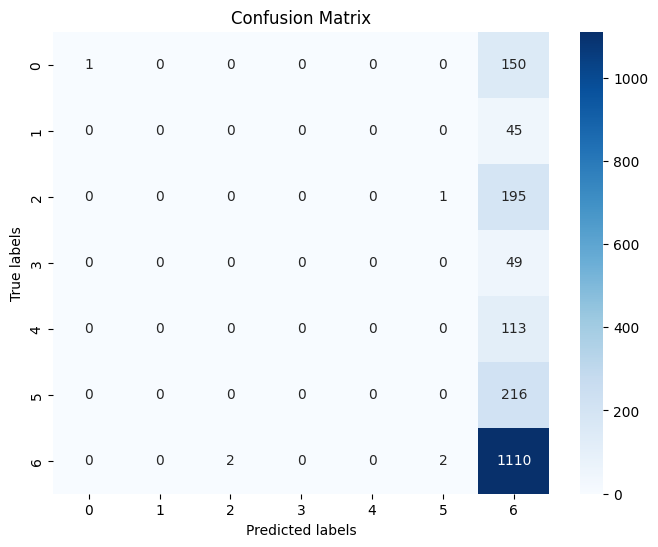

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Assuming you have already trained and evaluated your logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)  # Assuming you have X_train and y_train

# Assuming you have already calculated y_pred and y_probs
y_pred = logreg_model.predict(X_test)
y_probs = logreg_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, labels=logreg_model.classes_)

## Upsample Retrain

In [27]:
from sklearn.utils import resample

# Upsample minority classes
def upsample_data(df):
    # Identify minority and majority classes
    class_counts = df['video_type'].value_counts()
    minority_classes = class_counts[class_counts < class_counts.max()].index
    majority_class = class_counts.idxmax()
    
    # Upsample minority classes
    df_upsampled = pd.DataFrame(columns=df.columns)
    for minority_class in minority_classes:
        df_minority = df[df['video_type'] == minority_class]
        df_minority_upsampled = resample(df_minority, 
                                         replace=True,
                                         n_samples=class_counts.max(),
                                         random_state=42)
        df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])
    
    # Combine majority class with upsampled minority classes
    df_majority = df[df['video_type'] == majority_class]
    df_upsampled = pd.concat([df_majority, df_upsampled])
    
    return df_upsampled

# Load and upsample dataset
df_upsampled = upsample_data(video_type_classification_df)

# Check class distribution after upsampling
print(df_upsampled['video_type'].value_counts())


video_type
Tutorial             6005
Tips                 6005
News                 6005
Career Advice        6005
Project              6005
Podcast/Interview    6005
Challenge            6005
Name: count, dtype: int64


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with no preprocessing
tfidf_vectorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)

# Fit and transform the tokenized_video_title to TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df_upsampled['tokenized_video_title'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get TF-IDF values for each document
tfidf_values = tfidf_matrix.toarray()

# Create a DataFrame to store TF-IDF values for each word
tfidf_df = pd.DataFrame(tfidf_values, columns=feature_names)

tfidf_df


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,0,00,000,0051,01,01100100,02,03,04,05,...,क,करत,म,य,स,ह,ᵐᵒˢᵗˡʸ,𝐀,𝐂𝐎𝐃𝐄,𝐓𝐇𝐎𝐍
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.32093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42030,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42031,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42033,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Find the most important words (top TF-IDF words) overall
most_important_words_overall = tfidf_df.sum().nlargest(10)

# Display the most important words overall
most_important_words_overall

data           1383.166765
python          887.132150
science         720.349542
tutorial        683.457757
simplilearn     657.968162
coding          627.634295
challenge       627.126419
learning        603.960756
project         541.527291
ai              523.949961
dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Step 1: Merge DataFrames
merged_df = tfidf_df.merge(df_upsampled[['video_type']], left_index=True, right_index=True)

# Step 2: Split Data
X = merged_df.drop(columns=['video_type'])
y = merged_df['video_type']

# Step 3: Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize Logistic Regression Model
logreg_model = LogisticRegression()

# Step 6: Train the Model
logreg_model.fit(X_train, y_train)

# Step 7: Evaluate the Model
accuracy = logreg_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Step 8: Tune Hyperparameters (Optional)
# (e.g., using GridSearchCV)

# Step 9: Make Predictions (Optional)
# (e.g., logreg_model.predict(X_new))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6690852860711312


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


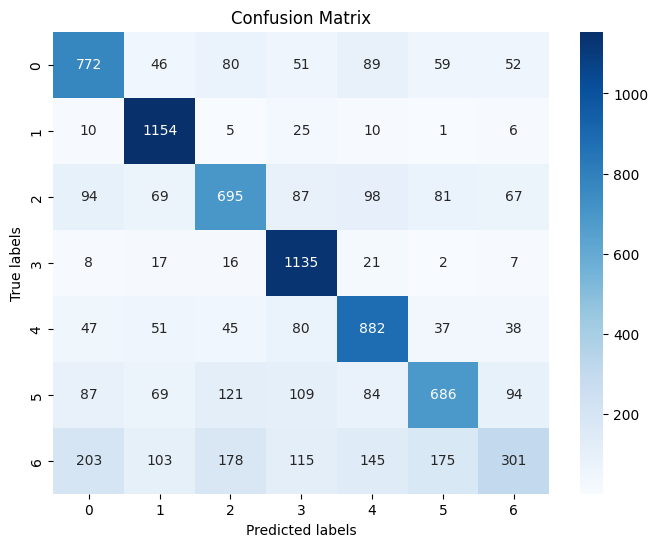

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Assuming you have already trained and evaluated your logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)  # Assuming you have X_train and y_train

# Assuming you have already calculated y_pred and y_probs
y_pred = logreg_model.predict(X_test)
y_probs = logreg_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, labels=logreg_model.classes_)

## LSTM

In [33]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Assuming your dataset is stored in video_type_classification_df DataFrame

# Data Cleaning and Pre-processing
# Convert text to lowercase
video_type_classification_df['video_title'] = video_type_classification_df['video_title'].str.lower()

# Tokenize into words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(video_type_classification_df['video_title'])
X_seq = tokenizer.texts_to_sequences(video_type_classification_df['video_title'])

# Padding sequences
max_len = 100  # Adjust the max_len as needed
X_padded = pad_sequences(X_seq, maxlen=max_len)

# Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(video_type_classification_df['video_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# One-Hot Encoding on the target variable (category)
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Define and Train the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=max_len))
model.add(LSTM(units=100))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=10, batch_size=64, validation_data=(X_test, y_test_onehot))

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print("Test Accuracy:", accuracy)


Epoch 1/10
127/127 [==============================] - 9s 65ms/step - loss: 1.2625 - accuracy: 0.6059 - val_loss: 1.0303 - val_accuracy: 0.6283
Epoch 2/10
127/127 [==============================] - 8s 62ms/step - loss: 0.8942 - accuracy: 0.6824 - val_loss: 0.9405 - val_accuracy: 0.6721
Epoch 3/10
127/127 [==============================] - 8s 62ms/step - loss: 0.7715 - accuracy: 0.7287 - val_loss: 0.9082 - val_accuracy: 0.6844
Epoch 4/10
127/127 [==============================] - 8s 62ms/step - loss: 0.6745 - accuracy: 0.7693 - val_loss: 0.8775 - val_accuracy: 0.7041
Epoch 5/10
127/127 [==============================] - 8s 62ms/step - loss: 0.5390 - accuracy: 0.8170 - val_loss: 0.9009 - val_accuracy: 0.7139
Epoch 6/10
127/127 [==============================] - 8s 65ms/step - loss: 0.4421 - accuracy: 0.8549 - val_loss: 0.9371 - val_accuracy: 0.7189
Epoch 7/10
127/127 [==============================] - 8s 66ms/step - loss: 0.3609 - accuracy: 0.8855 - val_loss: 1.0084 - val_accuracy: 0.7075

In [34]:
from sklearn.utils import resample

# Upsample minority classes
def upsample_data(df):
    # Identify minority and majority classes
    class_counts = df['video_type'].value_counts()
    minority_classes = class_counts[class_counts < class_counts.max()].index
    majority_class = class_counts.idxmax()
    
    # Upsample minority classes
    df_upsampled = pd.DataFrame(columns=df.columns)
    for minority_class in minority_classes:
        df_minority = df[df['video_type'] == minority_class]
        df_minority_upsampled = resample(df_minority, 
                                         replace=True,
                                         n_samples=class_counts.max(),
                                         random_state=42)
        df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])
    
    # Combine majority class with upsampled minority classes
    df_majority = df[df['video_type'] == majority_class]
    df_upsampled = pd.concat([df_majority, df_upsampled])
    
    return df_upsampled

# Load and upsample dataset
df_upsampled = upsample_data(video_type_classification_df)

# Check class distribution after upsampling
print(df_upsampled['video_type'].value_counts())


video_type
Tutorial             6005
Tips                 6005
News                 6005
Career Advice        6005
Project              6005
Podcast/Interview    6005
Challenge            6005
Name: count, dtype: int64


In [35]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Assuming your dataset is stored in video_type_classification_df DataFrame

# Upsample the dataset
df_upsampled = upsample_data(video_type_classification_df)

# Data Cleaning and Pre-processing
# Convert text to lowercase
df_upsampled['video_title'] = df_upsampled['video_title'].str.lower()

# Tokenize into words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df_upsampled['video_title'])
X_seq = tokenizer.texts_to_sequences(df_upsampled['video_title'])

# Padding sequences
max_len = 100  # Adjust the max_len as needed
X_padded = pad_sequences(X_seq, maxlen=max_len)

# Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_upsampled['video_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# One-Hot Encoding on the target variable (category)
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Define and Train the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=max_len))
model.add(LSTM(units=100))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=10, batch_size=64, validation_data=(X_test, y_test_onehot))

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print("Test Accuracy:", accuracy)


Epoch 1/10
526/526 [==============================] - 33s 61ms/step - loss: 1.0046 - accuracy: 0.6365 - val_loss: 0.4386 - val_accuracy: 0.8511
Epoch 2/10
526/526 [==============================] - 32s 60ms/step - loss: 0.3064 - accuracy: 0.9053 - val_loss: 0.2603 - val_accuracy: 0.9196
Epoch 3/10
526/526 [==============================] - 33s 63ms/step - loss: 0.1803 - accuracy: 0.9464 - val_loss: 0.1909 - val_accuracy: 0.9439
Epoch 4/10
526/526 [==============================] - 32s 61ms/step - loss: 0.1222 - accuracy: 0.9642 - val_loss: 0.1537 - val_accuracy: 0.9562
Epoch 5/10
526/526 [==============================] - 31s 60ms/step - loss: 0.0903 - accuracy: 0.9734 - val_loss: 0.1535 - val_accuracy: 0.9588
Epoch 6/10
526/526 [==============================] - 32s 60ms/step - loss: 0.0670 - accuracy: 0.9804 - val_loss: 0.1319 - val_accuracy: 0.9673
Epoch 7/10
526/526 [==============================] - 31s 59ms/step - loss: 0.0549 - accuracy: 0.9842 - val_loss: 0.1245 - val_accuracy:

263/263 [==============================] - 3s 11ms/step


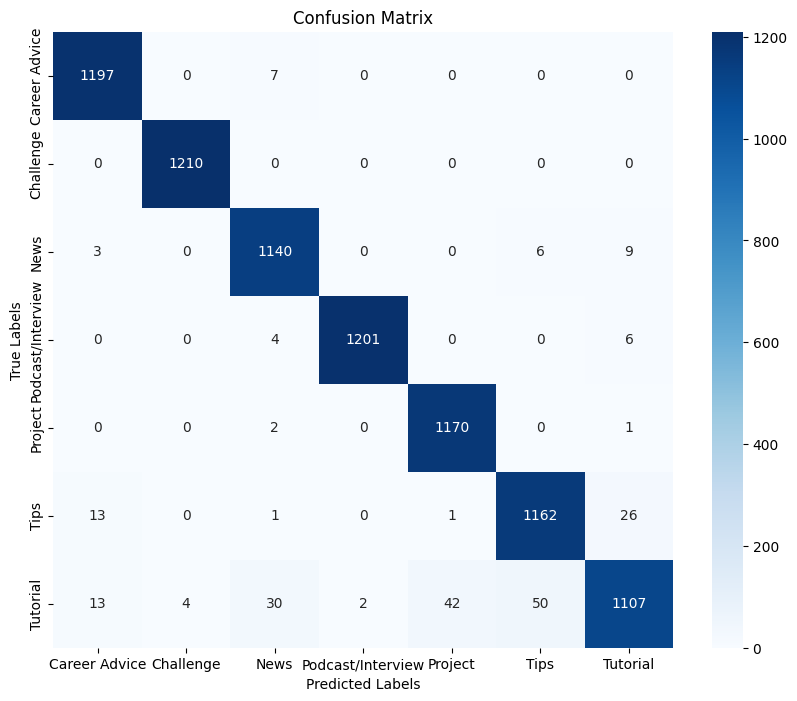

In [38]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [36]:
# Define a function to preprocess the input title
def preprocess_title(title):
    # Convert to lowercase
    title = title.lower()
    # Tokenize
    seq = tokenizer.texts_to_sequences([title])
    # Pad sequence
    padded_seq = pad_sequences(seq, maxlen=max_len)
    return padded_seq

# Define a function to classify a single title
def classify_title(title):
    # Preprocess the title
    processed_title = preprocess_title(title)
    # Predict the class probabilities
    class_probs = model.predict(processed_title)
    # Get the predicted class
    predicted_class = label_encoder.inverse_transform([np.argmax(class_probs)])
    return predicted_class[0]

# Manually enter a new title
new_title = ""

# Classify the new title
predicted_class = classify_title(new_title)
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 195ms/step
Predicted class: Tutorial


In [54]:
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Upsample minority classes in the training data only
def upsample_data(train_df):
    # Identify minority and majority classes
    class_counts = train_df['video_type'].value_counts()
    minority_classes = class_counts[class_counts < class_counts.max()].index
    majority_class = class_counts.idxmax()
    
    # Upsample minority classes
    df_upsampled = pd.DataFrame(columns=train_df.columns)
    for minority_class in minority_classes:
        df_minority = train_df[train_df['video_type'] == minority_class]
        df_minority_upsampled = resample(df_minority, 
                                         replace=True,
                                         n_samples=class_counts.max(),
                                         random_state=42)
        df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])
    
    # Combine majority class with upsampled minority classes
    df_majority = train_df[train_df['video_type'] == majority_class]
    df_upsampled = pd.concat([df_majority, df_upsampled])
    
    return df_upsampled

# Load dataset
# Assuming video_type_classification_df is already loaded

# Data Cleaning and Pre-processing
# Convert text to lowercase
video_type_classification_df['video_title'] = video_type_classification_df['video_title'].str.lower()

# Tokenize into words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(video_type_classification_df['video_title'])
X_seq = tokenizer.texts_to_sequences(video_type_classification_df['video_title'])

# Padding sequences
max_len = 100  # Adjust the max_len as needed
X_padded = pad_sequences(X_seq, maxlen=max_len)

# Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(video_type_classification_df['video_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Upsample the training data only
train_df = pd.DataFrame({'video_title': tokenizer.sequences_to_texts(X_train), 'video_type': label_encoder.inverse_transform(y_train)})
train_df_upsampled = upsample_data(train_df)

# Tokenize, pad sequences, and encode labels for upsampled training data
X_train_upsampled_seq = tokenizer.texts_to_sequences(train_df_upsampled['video_title'])
X_train_upsampled_padded = pad_sequences(X_train_upsampled_seq, maxlen=max_len)
y_train_upsampled = label_encoder.transform(train_df_upsampled['video_type'])
y_train_upsampled_onehot = to_categorical(y_train_upsampled, num_classes=len(label_encoder.classes_))

# Define and Train the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=max_len))
model.add(LSTM(units=100))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_upsampled_padded, y_train_upsampled_onehot, epochs=5, batch_size=64, validation_data=(X_test, to_categorical(y_test, num_classes=len(label_encoder.classes_))))

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, to_categorical(y_test, num_classes=len(label_encoder.classes_)))
print("Test Accuracy:", accuracy)


Epoch 1/5
530/530 [==============================] - 33s 59ms/step - loss: 0.9848 - accuracy: 0.6659 - val_loss: 1.0770 - val_accuracy: 0.6583
Epoch 2/5
530/530 [==============================] - 30s 57ms/step - loss: 0.2704 - accuracy: 0.9193 - val_loss: 1.3118 - val_accuracy: 0.6829
Epoch 3/5
530/530 [==============================] - 30s 57ms/step - loss: 0.1385 - accuracy: 0.9613 - val_loss: 1.5408 - val_accuracy: 0.6873
Epoch 4/5
530/530 [==============================] - 31s 58ms/step - loss: 0.0863 - accuracy: 0.9757 - val_loss: 1.7559 - val_accuracy: 0.6775
Epoch 5/5
64/64 [==============================] - 1s 11ms/step - loss: 1.9714 - accuracy: 0.6800
Test Accuracy: 0.6799606084823608


56/56 [==============================] - 1s 12ms/step


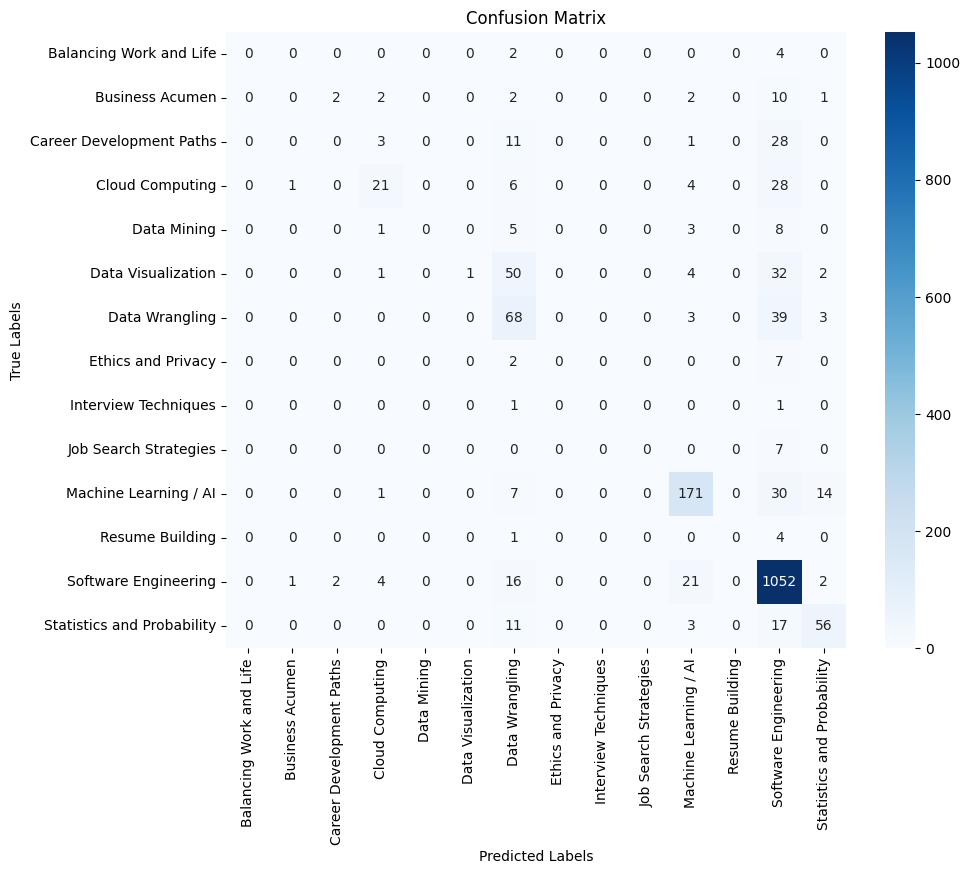

In [ ]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Video Topic Classification

In [41]:
video_topic_classification_df = videos_with_labelling_df[['video_id', 'video_title', 'video_topic']].copy()

In [42]:
video_topic_classification_df

,video_id,video_title,video_topic
0,a3GQBdLoUOo,Why Crypto isn't coming back. I'm getting out ...,Business Acumen
1,C3ilG2-tIn0,HBase Tutorial For Beginners | HBase In Hadoop...,Other
2,UT9zKFYr18U,PHP Tutorial (& MySQL) #40 - File System (part 2),Software Engineering
3,eaTC5aReb3w,🔥 Top 10 Highest Paying Cybersecurity Jobs For...,Software Engineering
4,UTOebGpWfno,Reasons Java Is Still Great #Simplilearn,Software Engineering
...,...,...,...
10995,TaE_fAqeeUE,Django 3 Blog: Creating Users in Django | Pyth...,Software Engineering
10996,7Ny10fQHw8A,10 Best Programming Languages And Top Technolo...,Software Engineering
10997,beUl8OgITj4,Introduction To Tensorflow,Machine Learning / AI
10998,WHnSIYV1KNQ,What is a Data Science Developer Advocate? And...,Other


In [43]:
video_topic_classification_df = video_topic_classification_df[video_topic_classification_df['video_topic'] != 'Other']

In [44]:
video_topic_classification_df = video_topic_classification_df[video_topic_classification_df['video_topic'].notnull()]

In [45]:
video_topic_classification_df

,video_id,video_title,video_topic
0,a3GQBdLoUOo,Why Crypto isn't coming back. I'm getting out ...,Business Acumen
2,UT9zKFYr18U,PHP Tutorial (& MySQL) #40 - File System (part 2),Software Engineering
3,eaTC5aReb3w,🔥 Top 10 Highest Paying Cybersecurity Jobs For...,Software Engineering
4,UTOebGpWfno,Reasons Java Is Still Great #Simplilearn,Software Engineering
5,WuDC_6gyvcQ,COMPONENTS & APPMODULE - Angular 2.0 Final - G...,Software Engineering
...,...,...,...
10994,y9nlfqT4s9s,Landing Page With Smooth Scroll - 3 Options,Software Engineering
10995,TaE_fAqeeUE,Django 3 Blog: Creating Users in Django | Pyth...,Software Engineering
10996,7Ny10fQHw8A,10 Best Programming Languages And Top Technolo...,Software Engineering
10997,beUl8OgITj4,Introduction To Tensorflow,Machine Learning / AI


In [46]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Assuming your dataset is stored in video_type_classification_df DataFrame

# Data Cleaning and Pre-processing
# Convert text to lowercase
video_topic_classification_df['video_title'] = video_topic_classification_df['video_title'].str.lower()

# Tokenize into words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(video_type_classification_df['video_title'])
X_seq = tokenizer.texts_to_sequences(video_topic_classification_df['video_title'])

# Padding sequences
max_len = 100  # Adjust the max_len as needed
X_padded = pad_sequences(X_seq, maxlen=max_len)

# Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(video_topic_classification_df['video_topic'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# One-Hot Encoding on the target variable (category)
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Define and Train the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=max_len))
model.add(LSTM(units=100))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=5, batch_size=64, validation_data=(X_test, y_test_onehot))

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print("Test Accuracy:", accuracy)


Epoch 1/5
112/112 [==============================] - 8s 61ms/step - loss: 1.5745 - accuracy: 0.6073 - val_loss: 1.3962 - val_accuracy: 0.6172
Epoch 2/5
112/112 [==============================] - 7s 64ms/step - loss: 1.2013 - accuracy: 0.6633 - val_loss: 1.0466 - val_accuracy: 0.7010
Epoch 3/5
112/112 [==============================] - 7s 64ms/step - loss: 0.9108 - accuracy: 0.7316 - val_loss: 0.9288 - val_accuracy: 0.7364
Epoch 4/5
112/112 [==============================] - 7s 62ms/step - loss: 0.7932 - accuracy: 0.7782 - val_loss: 0.8863 - val_accuracy: 0.7549
Epoch 5/5
56/56 [==============================] - 1s 12ms/step - loss: 0.8729 - accuracy: 0.7695
Test Accuracy: 0.7695334553718567


56/56 [==============================] - 1s 12ms/step


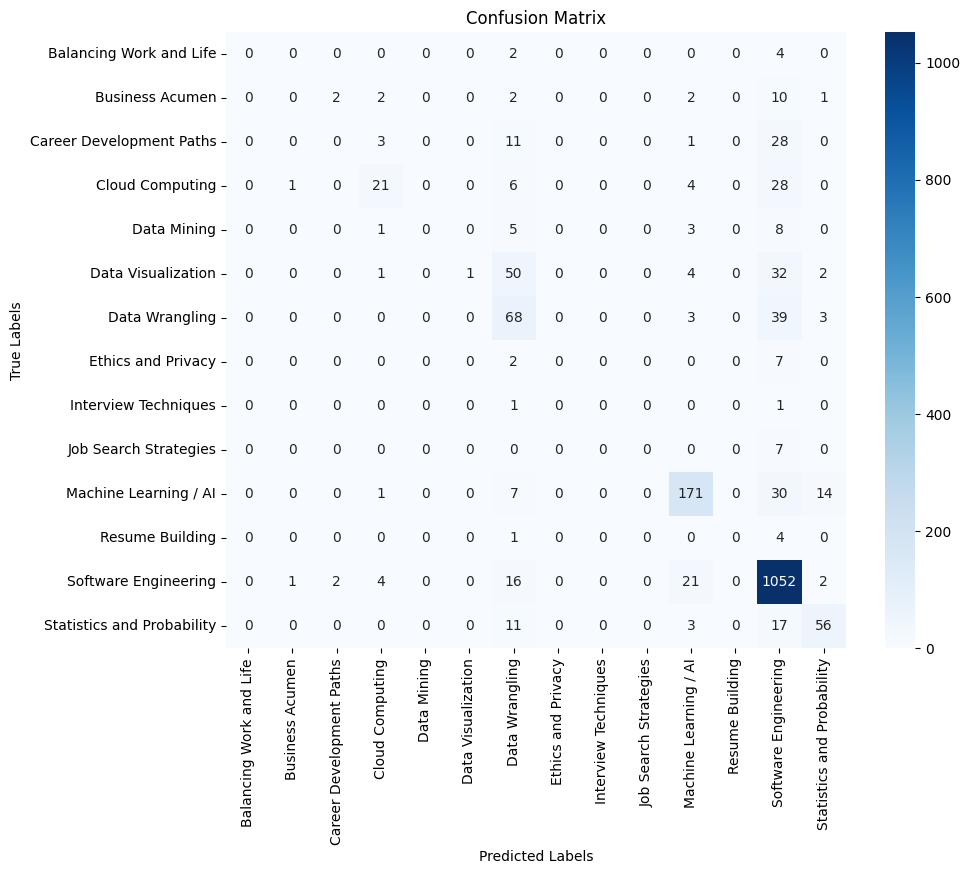

In [47]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [49]:
from sklearn.utils import resample

# Upsample minority classes
def upsample_data(df):
    # Identify minority and majority classes
    class_counts = df['video_topic'].value_counts()
    minority_classes = class_counts[class_counts < class_counts.max()].index
    majority_class = class_counts.idxmax()
    
    # Upsample minority classes
    df_upsampled = pd.DataFrame(columns=df.columns)
    for minority_class in minority_classes:
        df_minority = df[df['video_topic'] == minority_class]
        df_minority_upsampled = resample(df_minority, 
                                         replace=True,
                                         n_samples=class_counts.max(),
                                         random_state=42)
        df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])
    
    # Combine majority class with upsampled minority classes
    df_majority = df[df['video_topic'] == majority_class]
    df_upsampled = pd.concat([df_majority, df_upsampled])
    
    return df_upsampled

# Load and upsample dataset
df_upsampled = upsample_data(video_topic_classification_df)

# Check class distribution after upsampling
print(df_upsampled['video_topic'].value_counts())


video_topic
Software Engineering          5459
Machine Learning / AI         5459
Data Wrangling                5459
Statistics and Probability    5459
Data Visualization            5459
Cloud Computing               5459
Career Development Paths      5459
Business Acumen               5459
Ethics and Privacy            5459
Data Mining                   5459
Resume Building               5459
Job Search Strategies         5459
Balancing Work and Life       5459
Interview Techniques          5459
Name: count, dtype: int64


In [50]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Assuming your dataset is stored in video_type_classification_df DataFrame

# Data Cleaning and Pre-processing
# Convert text to lowercase
df_upsampled['video_title'] = df_upsampled['video_title'].str.lower()

# Tokenize into words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df_upsampled['video_title'])
X_seq = tokenizer.texts_to_sequences(df_upsampled['video_title'])

# Padding sequences
max_len = 100  # Adjust the max_len as needed
X_padded = pad_sequences(X_seq, maxlen=max_len)

# Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_upsampled['video_topic'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# One-Hot Encoding on the target variable (category)
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Define and Train the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=max_len))
model.add(LSTM(units=100))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=5, batch_size=64, validation_data=(X_test, y_test_onehot))

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print("Test Accuracy:", accuracy)


Epoch 1/5
956/956 [==============================] - 60s 62ms/step - loss: 0.7617 - accuracy: 0.7785 - val_loss: 0.1511 - val_accuracy: 0.9585
Epoch 2/5
956/956 [==============================] - 59s 62ms/step - loss: 0.0846 - accuracy: 0.9795 - val_loss: 0.0714 - val_accuracy: 0.9828
Epoch 3/5
956/956 [==============================] - 59s 62ms/step - loss: 0.0428 - accuracy: 0.9894 - val_loss: 0.0569 - val_accuracy: 0.9846
Epoch 4/5
956/956 [==============================] - 59s 62ms/step - loss: 0.0272 - accuracy: 0.9930 - val_loss: 0.0673 - val_accuracy: 0.9846
Epoch 5/5
478/478 [==============================] - 6s 12ms/step - loss: 0.0678 - accuracy: 0.9827
Test Accuracy: 0.9827293157577515


478/478 [==============================] - 6s 12ms/step


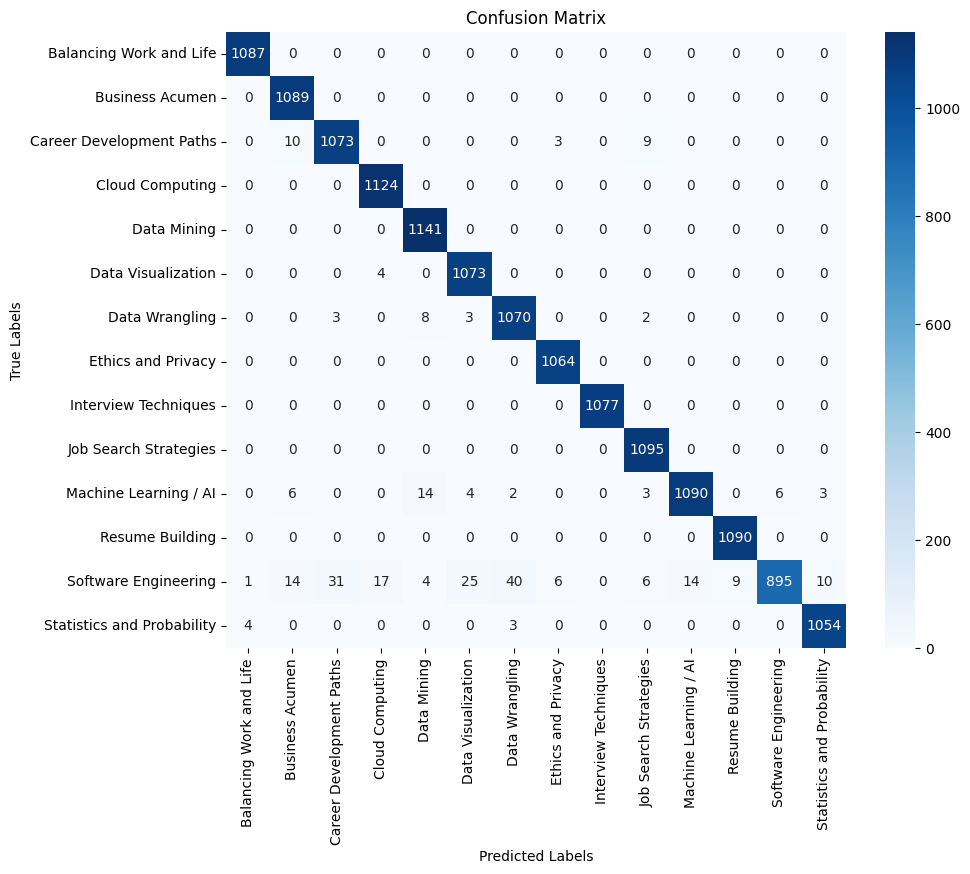

In [51]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Should upsample after train test split?

# LDA
# Data Association Mining